In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

results = {}

# Use the original data loaded in the first cell
data_original = pd.read_csv('sp500_data.csv', parse_dates=['Date']).sort_values('Date')

for n_lags in range(1, 6):
    print(f"Training LSTM model with {n_lags} lag days...")

    # Prepare data with varying lags
    data = data_original.copy()
    for lag in range(1, n_lags + 1):
        data[f'Close_lag{lag}'] = data['Close'].shift(lag)
    data = data.dropna().reset_index(drop=True)

    X = data[[f'Close_lag{lag}' for lag in range(1, n_lags + 1)]].values
    y = data['Close'].values

    # Train/test split (80% train) - need to re-calculate split based on potentially different number of rows after dropping NaNs
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Scale features and target
    scaler_X = MinMaxScaler(); scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled  = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
    y_test_scaled  = scaler_y.transform(y_test.reshape(-1,1)).flatten()

    # Prepare sequence input for LSTM (reverse lag order to chronological)
    # Reshape based on the current number of lags
    X_train_lstm = X_train_scaled[:, ::-1].reshape(-1, n_lags, 1)
    X_test_lstm  = X_test_scaled[:,  ::-1].reshape(-1, n_lags, 1)

    # Build and train LSTM model
    model = Sequential()
    # Update input_shape to match the current number of lags
    model.add(LSTM(50, input_shape=(n_lags, 1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    history = model.fit(X_train_lstm, y_train_scaled, epochs=20, batch_size=32, verbose=0)

    # Make predictions
    y_pred_lstm = scaler_y.inverse_transform(model.predict(X_test_lstm)).flatten()

    # Evaluate the model
    mse_lstm  = mean_squared_error(y_test, y_pred_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm   = r2_score(y_test, y_pred_lstm)
    mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)

    results[f'{n_lags}_lags'] = {'MSE': mse_lstm, 'RMSE': rmse_lstm, 'R^2': r2_lstm, 'MAPE': mape_lstm}

# Display results
print("\n--- Evaluation Results for Different Lag Days ---")
for lag, metrics in results.items():
    print(f"{lag}: MSE={metrics['MSE']:.1f}, RMSE={metrics['RMSE']:.1f}, R^2={metrics['R^2']:.3f}, MAPE={metrics['MAPE']:.3f}")

Training LSTM model with 1 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Training LSTM model with 2 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Training LSTM model with 3 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Training LSTM model with 4 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training LSTM model with 5 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

--- Evaluation Results for Different Lag Days ---
1_lags: MSE=4689.4, RMSE=68.5, R^2=0.990, MAPE=0.011
2_lags: MSE=7230.4, RMSE=85.0, R^2=0.984, MAPE=0.014
3_lags: MSE=9652.7, RMSE=98.2, R^2=0.979, MAPE=0.015
4_lags: MSE=19109.4, RMSE=138.2, R^2=0.958, MAPE=0.023
5_lags: MSE=9550.5, RMSE=97.7, R^2=0.979, MAPE=0.015


Generating visualization for LSTM model with 1 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


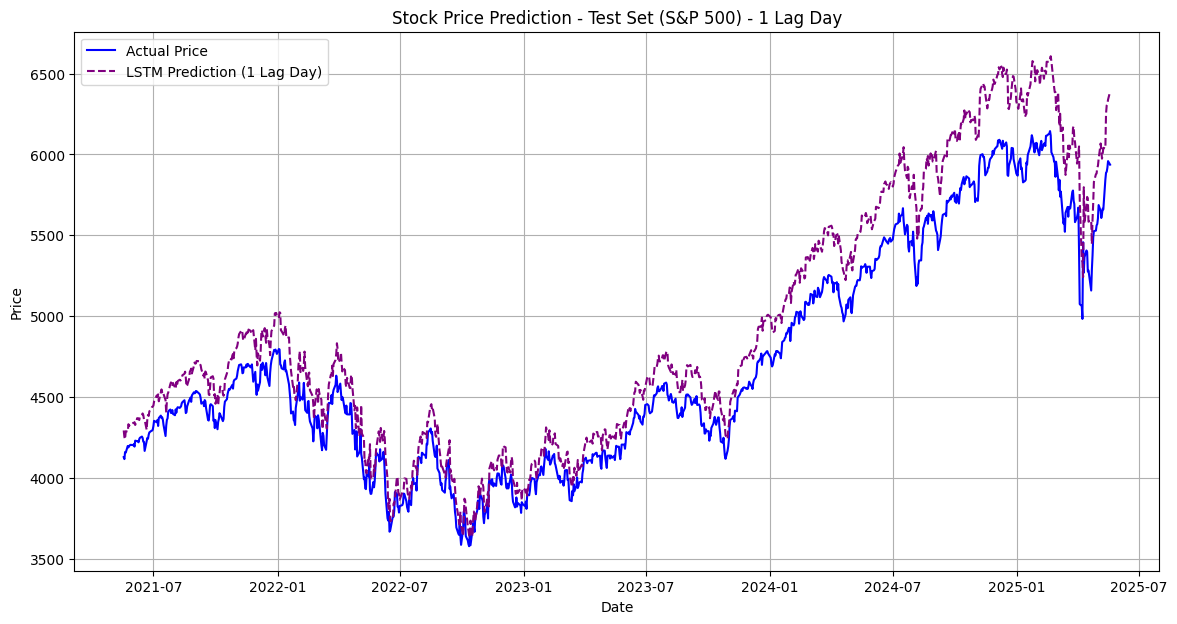

Generating visualization for LSTM model with 2 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


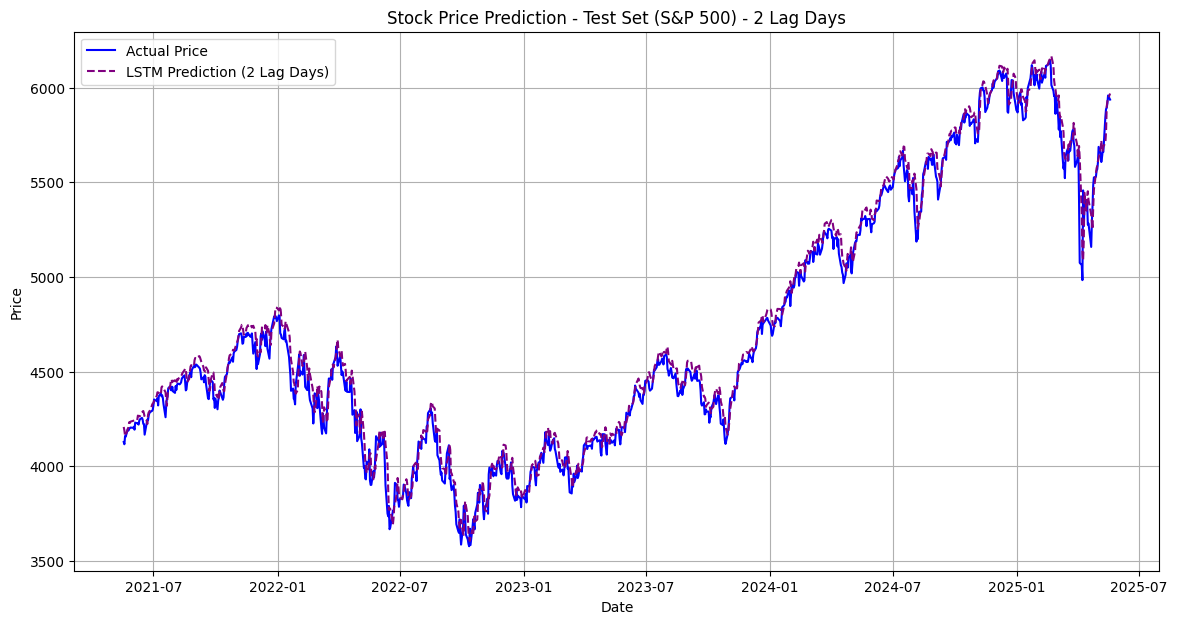

Generating visualization for LSTM model with 3 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


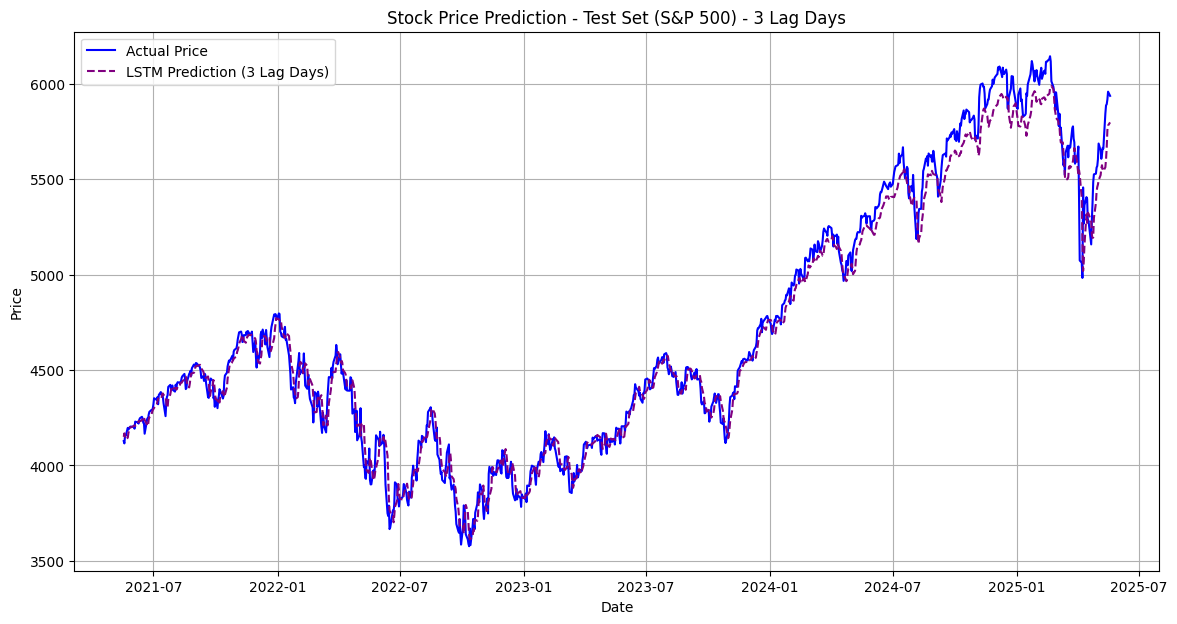

Generating visualization for LSTM model with 4 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


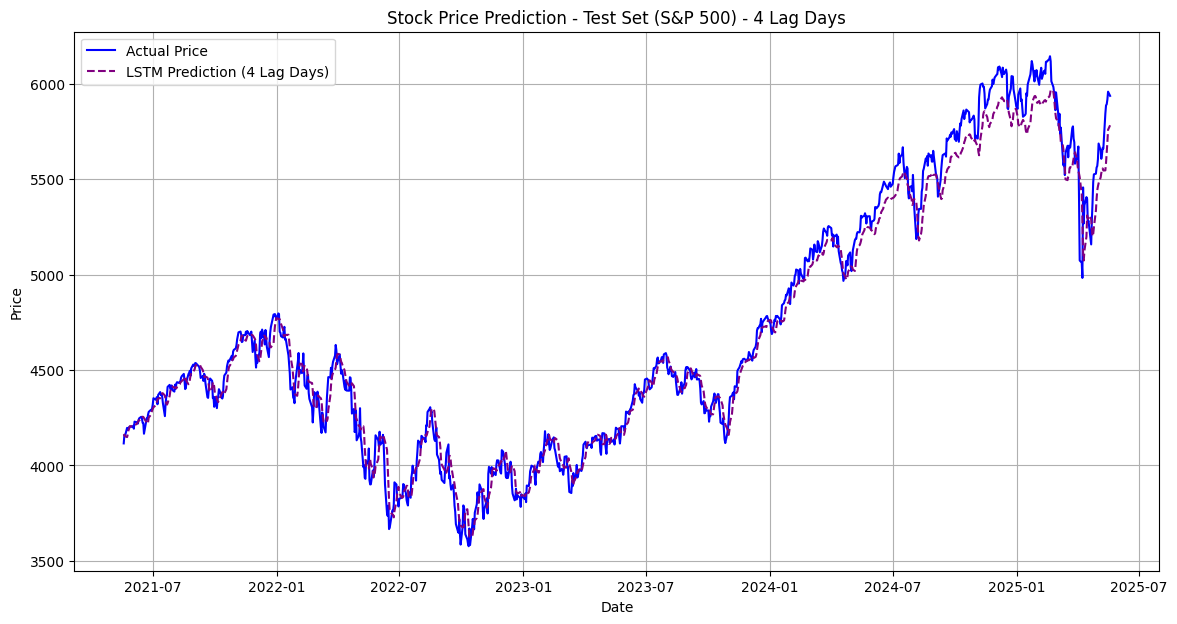

Generating visualization for LSTM model with 5 lag days...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


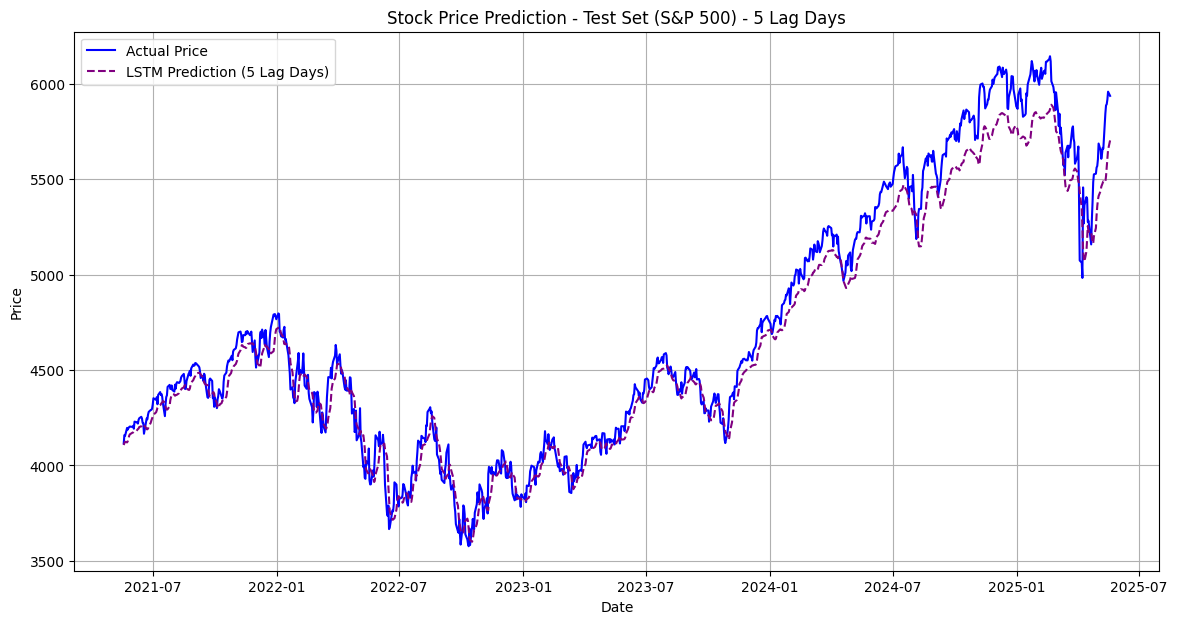

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Use the original data loaded in the first cell
data_original = pd.read_csv('sp500_data.csv', parse_dates=['Date']).sort_values('Date')

# Iterate through each lag configuration and generate a plot
for n_lags in range(1, 6):
    print(f"Generating visualization for LSTM model with {n_lags} lag days...")

    # Prepare data with varying lags
    data = data_original.copy()
    for lag in range(1, n_lags + 1):
        data[f'Close_lag{lag}'] = data['Close'].shift(lag)
    data = data.dropna().reset_index(drop=True)

    X = data[[f'Close_lag{lag}' for lag in range(1, n_lags + 1)]].values
    y = data['Close'].values

    # Train/test split
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    dates_test = data['Date'].iloc[split:].reset_index(drop=True)

    # Scale features and target
    scaler_X = MinMaxScaler(); scaler_y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled  = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
    y_test_scaled  = scaler_y.transform(y_test.reshape(-1,1)).flatten()

    # Prepare sequence input for LSTM
    X_train_lstm = X_train_scaled[:, ::-1].reshape(-1, n_lags, 1)
    X_test_lstm  = X_test_scaled[:,  ::-1].reshape(-1, n_lags, 1)

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(n_lags, 1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # Using fewer epochs for quicker visualization, original training used 20
    history = model.fit(X_train_lstm, y_train_scaled, epochs=10, batch_size=32, verbose=0)

    # Make predictions
    y_pred_lstm = scaler_y.inverse_transform(model.predict(X_test_lstm)).flatten()

    # Create a DataFrame with dates and predictions
    test_results = pd.DataFrame({
        'Date': dates_test,
        'Actual': y_test,
        f'LSTM_Pred_{n_lags}_lag': y_pred_lstm
    })

    # Plot actual vs predicted prices
    plt.figure(figsize=(14, 7))
    plt.plot(test_results['Date'], test_results['Actual'], label='Actual Price', color='blue')
    plt.plot(test_results['Date'], test_results[f'LSTM_Pred_{n_lags}_lag'], label=f'LSTM Prediction ({n_lags} Lag Day{"s" if n_lags > 1 else ""})', color='purple', linestyle='--')
    plt.title(f'Stock Price Prediction - Test Set (S&P 500) - {n_lags} Lag Day{"s" if n_lags > 1 else ""}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
!pip install shap